<a href="https://colab.research.google.com/github/Fragoa/SE3-deep-learning/blob/main/LearningRateScheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Time-based decay**

In [8]:
def lr_time_based_decay(epoch, lr0=0.05, n_epochs=50):

  return lr0 / (1 + epoch * (lr0 / n_epochs))

In [5]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates = [lr_time_based_decay(epoch, initial_learning_rate, total_epochs) for epoch in epochs]

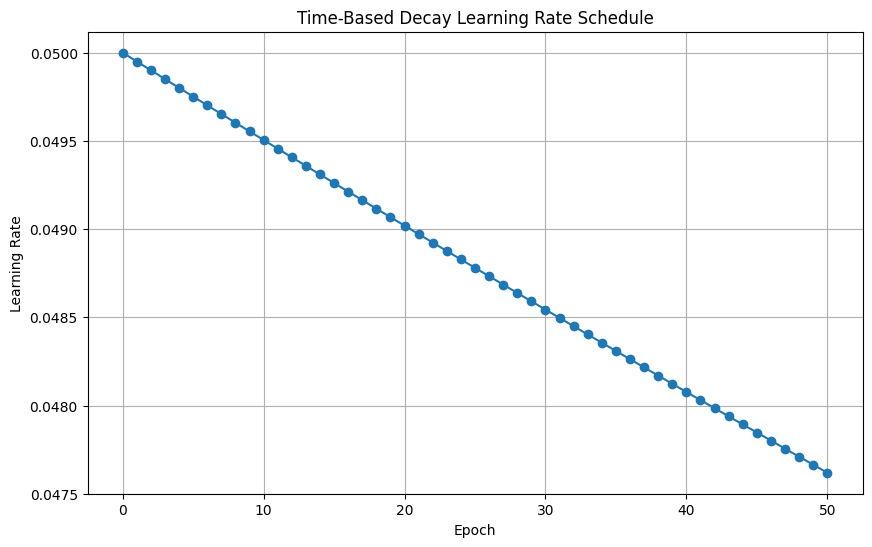

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, marker='o')
plt.title('Time-Based Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**Step Decay**

In [7]:
def lr_step_decay(epoch, initial_lr=0.05, step_size=10, gamma=0.5):

  drop = math.floor(epoch / step_size)
  return initial_lr * (gamma ** drop)

In [10]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates_step = [lr_step_decay(epoch, initial_learning_rate) for epoch in epochs]

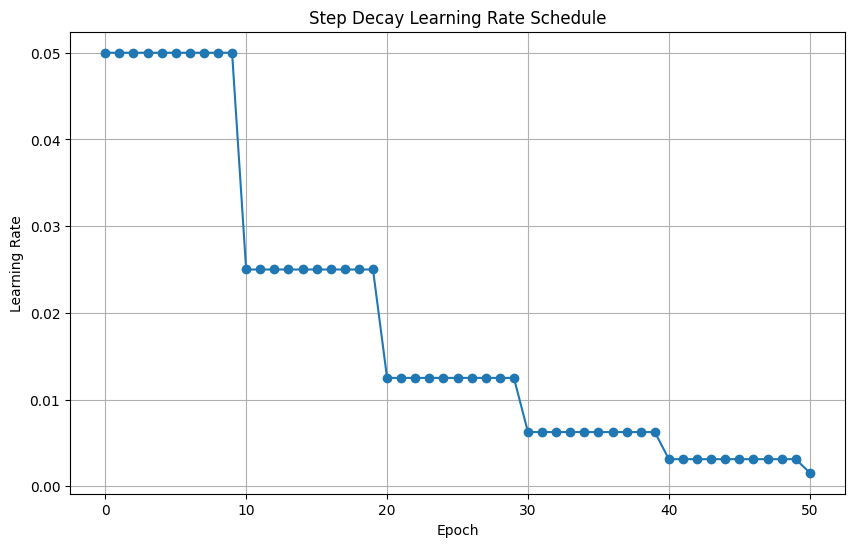

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates_step, marker='o')
plt.title('Step Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**Exponential decay**

In [12]:
def lr_exp_decay(epoch, initial_lr=0.05, decay_rate=0.01):

  return initial_lr * math.exp(-decay_rate * epoch)

In [13]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates_exp = [lr_exp_decay(epoch, initial_learning_rate) for epoch in epochs]

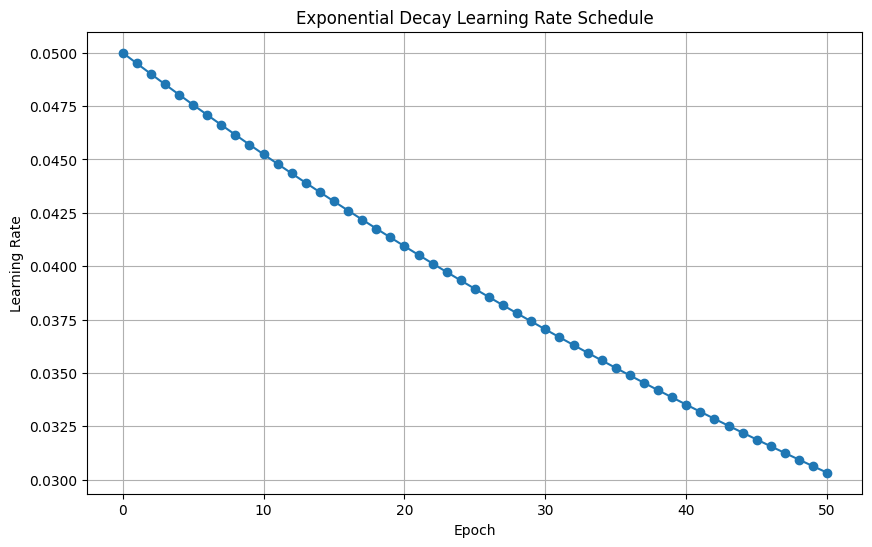

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates_exp, marker='o')
plt.title('Exponential Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**Train Model with Time-based Decay**

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [22]:
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(121, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
    return model

In [23]:
model_time_based = create_model()

optimizer_time_based = keras.optimizers.Adam(learning_rate=0.01)

model_time_based.compile(optimizer=optimizer_time_based,
                         loss="categorical_crossentropy",
                         metrics=["accuracy"])

lr_callback_time_based = keras.callbacks.LearningRateScheduler(lr_time_based_decay)

history_time_based = model_time_based.fit(x_train, y_train,
                                          epochs=20,
                                          batch_size=32,
                                          validation_data=(x_test, y_test),
                                          callbacks=[lr_callback_time_based],
                                          verbose=0)

In [25]:
model_step = create_model()

optimizer_step = keras.optimizers.Adam(learning_rate=0.01)

model_step.compile(optimizer=optimizer_step,
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

lr_callback_step = keras.callbacks.LearningRateScheduler(lr_step_decay)

history_step = model_step.fit(x_train, y_train,
                               epochs=20,
                               batch_size=32,
                               validation_data=(x_test, y_test),
                               callbacks=[lr_callback_step],
                               verbose=0)

In [26]:
model_exp = create_model()

optimizer_exp = keras.optimizers.Adam(learning_rate=0.01)

model_exp.compile(optimizer=optimizer_exp,
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

lr_callback_exp = keras.callbacks.LearningRateScheduler(lr_exp_decay)

history_exp = model_exp.fit(x_train, y_train,
                              epochs=20,
                              batch_size=32,
                              validation_data=(x_test, y_test),
                              callbacks=[lr_callback_exp],
                              verbose=0)

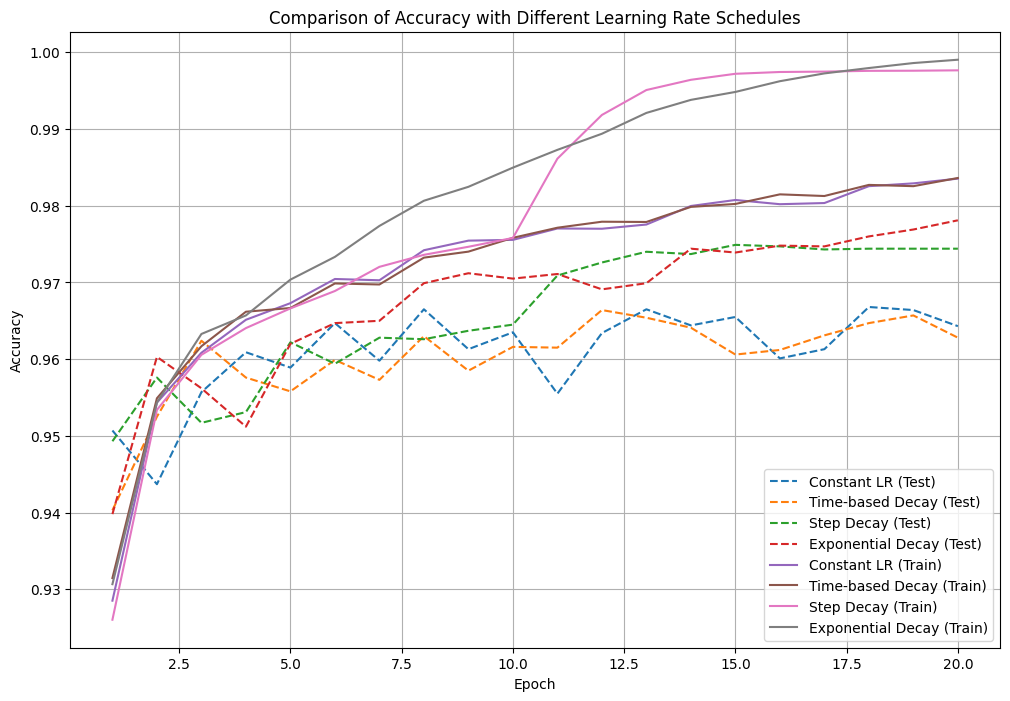

In [27]:
model_constant = create_model()
optimizer_constant = keras.optimizers.Adam(learning_rate=0.01)
model_constant.compile(optimizer=optimizer_constant,
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])
history_constant = model_constant.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=32,
                                       validation_data=(x_test, y_test),
                                       verbose=0)

acc_time_based_train = history_time_based.history['accuracy']
acc_time_based_test = history_time_based.history['val_accuracy']

acc_step_train = history_step.history['accuracy']
acc_step_test = history_step.history['val_accuracy']

acc_exp_train = history_exp.history['accuracy']
acc_exp_test = history_exp.history['val_accuracy']

acc_constant_train = history_constant.history['accuracy']
acc_constant_test = history_constant.history['val_accuracy']

epochs_range = range(1, len(history_time_based.history['accuracy']) + 1)

plt.figure(figsize=(12, 8))

plt.plot(epochs_range, acc_constant_test, label='Constant LR (Test)', linestyle='--')
plt.plot(epochs_range, acc_time_based_test, label='Time-based Decay (Test)', linestyle='--')
plt.plot(epochs_range, acc_step_test, label='Step Decay (Test)', linestyle='--')
plt.plot(epochs_range, acc_exp_test, label='Exponential Decay (Test)', linestyle='--')

plt.plot(epochs_range, acc_constant_train, label='Constant LR (Train)')
plt.plot(epochs_range, acc_time_based_train, label='Time-based Decay (Train)')
plt.plot(epochs_range, acc_step_train, label='Step Decay (Train)')
plt.plot(epochs_range, acc_exp_train, label='Exponential Decay (Train)')

plt.title('Comparison of Accuracy with Different Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()